<h1><center> Prediction of Payment date of an invoice using EDA,FE,FS & Modeling</center></h1><i><b>~Shranjay Singh</b></i>

# Importing the Dataset & Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore")

#Reading the Given Dataset:
df=pd.read_csv("1805607.csv")
data_used=pd.read_csv("1805607.csv")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200739006,AL,30-11-2019 00:00,2019,1930129903,13-11-2019,20191108,20191113,20191128,USD,RV,1,NaN,19450.19,20191113,NAA8,1.930130e+09,0
1,U001,200780825,SYSCO FO co,31-07-2019 00:00,2019,1929618049,15-07-2019,20190713,20190715,20190730,USD,RV,1,NaN,39026.66,20190715,NAA8,1.929618e+09,0
2,U001,200761734,H E BUT in,21-08-2019 00:00,2019,1929715006,07-08-2019,20190807,20190807,20190822,USD,RV,1,NaN,84016.99,20190807,NAA8,1.929715e+09,0
3,U001,200793568,SUPE,19-11-2019 00:00,2019,1930066167,29-10-2019,20191029,20191029,20191113,USD,RV,1,NaN,132092.13,20191029,NAA8,1.930066e+09,0
4,U001,200706844,WINC corp,29-07-2019 00:00,2019,1929580410,12-07-2019,20190705,20190712,20190727,USD,RV,1,NaN,3942.40,20190712,NAA8,1.929580e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200759878,SA co,NaN,2020,1930631506,10-03-2020,20200310,20200310,20200325,USD,RV,1,NaN,47908.50,20200310,NAH4,1.930632e+09,1
49996,CA02,140104249,SOB trust,NaN,2020,2960629211,16-04-2020,20200416,20200416,20200505,CAD,RV,1,NaN,122958.67,20200425,CA10,2.960629e+09,1
49997,U001,200721330,PARK foundation,NaN,2020,1930664087,17-03-2020,20200317,20200317,20200327,USD,RV,1,NaN,46168.00,20200317,NA10,1.930664e+09,1
49998,U001,200769623,WAL-MAR corporation,NaN,2020,1930812781,21-04-2020,20200422,20200421,20200506,USD,RV,1,NaN,32525.94,20200421,NAH4,1.930813e+09,1


<br>
<hr style="height:2px;border-width:0;color:gray;background-color:black"">
<br>

# Viewing and Preprocessing of Data

<i>Here we will clean the data like removing constants or quassi constants and deal with null values. Introducing a target variable and dealing with categorical ordinal and numeric values.</i>

<p style="font-family:monospace">~ Number of Rows and Columns in the Dataset respectively:</p>

In [ ]:
df.shape

(50000, 19)

<p style="font-family:monospace">~ Enlisting all the column names:</p>

In [ ]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

<p style="font-family:monospace">~ Finding any <b>Constant Features</b> that maybe present in the dataset:</p>

In [ ]:
df.nunique()

business_code                 6
cust_number                1091
name_customer              4282
clear_date                  399
buisness_year                 2
doc_id                    50000
posting_date                498
document_create_date        499
document_create_date.1      500
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         45262
baseline_create_date        501
cust_payment_terms           71
invoice_id                49993
isOpen                        2
dtype: int64

<ul><li>the columns <b>'posting_id '</b> and possibly <b>'area_business '</b> are Constant Features, therefore we may drop these Features.<br>
    <li><b>'doc_id '</b> has a unique value for each and every row, therefore we may use this feature as the Primary Key or the Index for our Dataset.
    <li>    

We can drop columns with 0 or 1 as they have null or constant values.

<p style="font-family:monospace">~ Finding the presence of any <b>Null Columns</b> and the Number of Null values in each Column:</p>

In [ ]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 4689
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

<ul><li>'<b><i>area_business</i></b> ' is entirely a NULL column therefore we have to <b>definitely drop this feature</b>
    <li><b>'invoice_id '</b> has very few Null Values

In [ ]:
df.drop(['area_business','posting_id'],axis=1,inplace=True)

<p style="font-family:monospace">~ The <b>Data Type</b> of every Column in the Dataset:</p>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
business_code             50000 non-null object
cust_number               50000 non-null object
name_customer             50000 non-null object
clear_date                45311 non-null object
buisness_year             50000 non-null int64
doc_id                    50000 non-null int64
posting_date              50000 non-null object
document_create_date      50000 non-null int64
document_create_date.1    50000 non-null int64
due_in_date               50000 non-null int64
invoice_currency          50000 non-null object
document type             50000 non-null object
total_open_amount         50000 non-null float64
baseline_create_date      50000 non-null int64
cust_payment_terms        50000 non-null object
invoice_id                49993 non-null float64
isOpen                    50000 non-null int64
dtypes: float64(2), int64(7), object(8)
memory usage: 6.5+ MB


<ul>
    <li>None of the <b>Date Columns</b> are of <b>datetime</b> format. We need to convert these columns to extract further data from them.</li>
</ul></p><br>

~ From the <b>Data Dictionary</b>, We can observe that the '<b><i>doc_id</i></b> ' and '<b><i>invoice_id</i></b>' almost have the same description or role as the <b>Unique Identifier of each Invoice</b>, therefore we check for any similarity between the two, to avoid any <b>Duplicacy</b> in the Dataset:

In [ ]:
print(df['doc_id'].equals(df['invoice_id']))

ser1=df['doc_id']
ser2=df['invoice_id']
union = pd.Series(np.union1d(ser1, ser2))
intersect = pd.Series(np.intersect1d(ser1, ser2))                   #Calculating A∩B to find the common items
print('Number of Common Elements:',len(intersect))

notcommon = list(np.setdiff1d(ser1,ser2))                            #Calculating AUB
print('Number of Uncommon Elements:',len(notcommon))
print('Uncommon Elements:\n'+str(notcommon))

for i in df['document type'].unique():
    print(i,'\n',df[df['document type']==i].count())

False
Number of Common Elements: 49993
Number of Uncommon Elements: 7
Uncommon Elements:
[9500000004, 9500000037, 9500000063, 9500000067, 9500000072, 9500000105, 9500000128]
RV 
 business_code             49993
cust_number               49993
name_customer             49993
clear_date                45304
buisness_year             49993
doc_id                    49993
posting_date              49993
document_create_date      49993
document_create_date.1    49993
due_in_date               49993
invoice_currency          49993
document type             49993
total_open_amount         49993
baseline_create_date      49993
cust_payment_terms        49993
invoice_id                49993
isOpen                    49993
dtype: int64
X2 
 business_code             7
cust_number               7
name_customer             7
clear_date                7
buisness_year             7
doc_id                    7
posting_date              7
document_create_date      7
document_create_date.1    7
due_in_

<ul><li>Here we can observe doc type is X2 only at very very few places and at all those places <b>invoice id</b> is also null.
Also at all other places doc id is same as invoice id. Dropping few rows out of so many won't affect the model. Also 2 columns will get reduced. So i am dropping the few rows.<br>
    <li>The Number of Uncommon Items Co-incide with the number of Null Values in the 'invoice_id '

In [ ]:
indices=df[df['document type']=='X2'].index
df.drop(indices,axis=0,inplace=True)

In [ ]:
print(df.nunique())

business_code                 6
cust_number                1090
name_customer              4279
clear_date                  399
buisness_year                 2
doc_id                    49993
posting_date                498
document_create_date        499
document_create_date.1      498
due_in_date                 545
invoice_currency              2
document type                 1
total_open_amount         45256
baseline_create_date        499
cust_payment_terms           71
invoice_id                49993
isOpen                        2
dtype: int64


~Now I can drop <b>document type</b> and <b>invoice_id</b> (as its duplicate of doc_id)

In [ ]:
df.drop(['document type','invoice_id'],axis=1,inplace=True)

<p style="font-family:monospace">~ Converting all the <b>Date Columns</b> into datetime format:

In [ ]:
#Selecting all the Columns with 'date' in their Names under a single variable: date_columns
date_columns = [cols for cols in df.columns if "date" in cols]
listofframes=[df,data_used]

#     float -> int -> string -> datetime (To avoid any errors)
for i in listofframes:
    for cols in date_columns:
        if i[cols].dtypes == 'float64':
            i[cols] = i[cols].astype('int64')
        if i[cols].dtypes == 'int64':
            i[cols] = i[cols].astype('str')
        i[cols] = pd.to_datetime(i[cols])

<p style="font-family:monospace">~ Creating the <b>Target Feature</b> => '<b><i>delay</i></b>':</p>

In [ ]:
df['delay']=(df['clear_date']-df['due_in_date']).dt.days

In [ ]:
checker=df['document_create_date']-df['document_create_date.1']
checker.mean()

Timedelta('-1 days +04:13:00.877322')

~We can use only the document create date.1 and drop the other as it won't matter.

In [ ]:
df.drop(['document_create_date'],axis=1,inplace=True)

<ul><li>We will check for all the anomalies.
Logically, all the "<b>Date Columns</b>", should follow the precedence of:<br>
    <center>'<b><i>document_create_date.1</i></b>' < = '<b><i>posting_date</i></b>' < = '<b><i>baseline_create_date</i></b>' <  ('<b><i>due_in_date</i></b>', '<b><i>clear_date</i></b>')</center><br>
    <li><b>due_in_date</b>' may be greater or less than '<b>clear_date</b>' depending upon the Delay of Payment.
        <li> And None of the values of '<b>total_open_amount</b>' can be zero or less.<br><br>
        ~ <b>Therefore,Locating and Dropping all the rows with "Anomalies":</b>

In [ ]:
list2d=[['baseline_create_date','due_in_date'],['baseline_create_date','clear_date'],
        ['posting_date','baseline_create_date'],['document_create_date.1','posting_date']]
listofframes=[df,data_used]
for j in listofframes:
    for i in list2d:
        indices=j[j[i[0]]>j[i[1]]].index   # 'indices' stores all the indexes where the above mentioned precedence isn't followed
        print(indices)
        j.drop(indices,axis=0,inplace=True)

Int64Index([], dtype='int64')
Int64Index([   25,    37,    42,    44,    50,    52,    55,    59,    63,
               66,
            ...
            45257, 45277, 45283, 45288, 45293, 45295, 45297, 45298, 45301,
            45303],
           dtype='int64', length=7938)
Int64Index([    4,     6,     8,    21,    23,    24,    29,    31,    39,
               43,
            ...
            49971, 49979, 49982, 49983, 49984, 49986, 49988, 49991, 49994,
            49995],
           dtype='int64', length=11162)
Int64Index([    2,     7,     9,    10,    11,    13,    14,    15,    19,
               35,
            ...
            49922, 49930, 49933, 49941, 49942, 49963, 49970, 49973, 49980,
            49981],
           dtype='int64', length=7571)
Int64Index([], dtype='int64')
Int64Index([   25,    37,    42,    44,    50,    52,    55,    59,    63,
               66,
            ...
            45257, 45277, 45283, 45288, 45293, 45295, 45297, 45298, 45301,
            45303],
  

<br><b><p style="font-family:monospace">~To compare total open amounts we convert CAD to USD taking mean of previous few years we observe its near about 1CAD=0.75USD</b></p>

In [ ]:
indices=df.loc[df['invoice_currency']=='CAD'].index
for i in indices:
    df['total_open_amount'][i]=df['total_open_amount'][i]*0.75

<br><b><p style="font-family:monospace">~Checking for amount in negative if exists.</p></b>

In [ ]:
df.loc[df['total_open_amount']<=0].count()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
isOpen                    0
delay                     0
dtype: int64

<br>
<hr style="height:2px;border-width:0;color:gray;background-color:black"">
<br>

#  Spliting the Data set

In [ ]:
df.loc[(df['isOpen']==1) & (df['clear_date'].isnull()==False)]
df.loc[(df['isOpen']==0) & (df['clear_date'].isnull()==True)]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay


we observe that column 'isOpen' and 'Clear_date' give us the same information. So we can drop one of them. Before that we can use isOpen for Spliting test data from train and val data.

## One hot Encoding

~Using one Hot encoder on <b>Business_Code</b> before spliting as it will cause problems and unnecessary lines of code afterwards

In [ ]:
#using get dummies as its easier.
dummy=pd.get_dummies(df['business_code'])
df=pd.concat([df,dummy],axis=1)

<p style="font-family:monospace">~ The <b>First Split</b> is done based on the '<i><b>isOpen</b></i>' Feature, as the Rows with 1s in them are <b>Incomplete Transactions</b> and we need to predict the delay in their payment using our model:</p>
<p style="font-family:monospace">~ However, after this split, the '<i><b>isOpen</b></i>' column becomes a <b>Constant Column</b> in each DataFrame.<br>~ Dropping the <b>Constant Column</b>:

In [ ]:
Test = df[df['isOpen']==1].copy()
Train = df[df['isOpen']==0].copy()

Train.drop(['isOpen'],axis=1,inplace=True)
Test.drop(['isOpen'],axis=1,inplace=True)

## Sorting by Create dates before spliting

<p style="font-family:monospace">~ This Split is done based on the '<i><b>document_create_date.1</b></i>' column, therefore, we <b>sort this column</b> first:

In [ ]:
Train.sort_values(by=['document_create_date.1'],inplace=True)

Before spliting our train data into train-70% validation1=15% validation2=15% we will sort our values w.r.t Doc create date. This is done so that model trains on previous dates and validates on the later ones.
<p style="font-family:monospace">~ The Next Split is done the following way:<br>
    <b>Train: 70% &nbsp;| &nbsp;Validation: 15% &nbsp; | &nbsp;Local_Test: 15%</b></center>

In [ ]:
train ,val = train_test_split(Train,test_size = 0.1, shuffle = False ,random_state = 1)
val1 ,val2 = train_test_split(val,test_size = 0.5, shuffle = False ,random_state = 1)
print(train.shape,"=>",val1.shape,val2.shape)

(18568, 19) => (1032, 19) (1032, 19)


<br>
<hr style="height:2px;border-width:0;color:gray;background-color:black"">
<br>

# Encoding Data on train and mapping to val,test

Viewing how our train dataset looks: then further carrying out processes like encoding/modifying columns.
I have used Target,OneHot and Label encodings wherever required accordingly. I am mapping it with validation and test simultaneously.

# Target Encoding

<p style="font-family:monospace">~ <b>Target Encoding</b> all the Categorical Features using the <i>Mean</i> or <i>Average</i> of the Target Feature:</p>

In [ ]:
#target encoding:
# cols = Dictionary with Categorical Columns mapped to their Target Encoded Counterpart's Names
cols_used= {'business_code':'average_business_code_delay',
            'cust_payment_terms':'cust_payment_terms_delay',
            'invoice_currency':'invoice_currency_delay',
            'cust_number':'avg_customer_delay'}
for i in cols_used:
    mapper=train.groupby(train[i])['delay'].mean().to_dict()
    train[cols_used[i]]=train[i].map(mapper)
    val1[cols_used[i]]=val1[i].map(mapper)
    val2[cols_used[i]]=val2[i].map(mapper)
    Test[cols_used[i]]=Test[i].map(mapper)

#Creating a New Feature showcasing the Average amount paid by each customer throughout the Dataset:
mapper=train.groupby(train['cust_number'])['total_open_amount'].mean().to_dict()
train['cust_total_amount']=train['cust_number'].map(mapper)
val1['cust_total_amount']=val1['cust_number'].map(mapper)
val2['cust_total_amount']=val2['cust_number'].map(mapper)
Test['cust_total_amount']=Test['cust_number'].map(mapper)

~performing null imputations in val1,val2,Test due to encoding:

In [ ]:
list_of_nulls=['cust_payment_terms_delay','avg_customer_delay','cust_total_amount']
for i in list_of_nulls:
    val2[i]=val2[i].fillna(val2[i].mean())
    val1[i]=val1[i].fillna(val1[i].mean())
    Test[i]=Test[i].fillna(Test[i].mean())
print(val2.isna().any(),val1.isna().any())

business_code                  False
cust_number                    False
name_customer                  False
clear_date                     False
buisness_year                  False
doc_id                         False
posting_date                   False
document_create_date.1         False
due_in_date                    False
invoice_currency               False
total_open_amount              False
baseline_create_date           False
cust_payment_terms             False
delay                          False
CA02                           False
U001                           False
U002                           False
U005                           False
U013                           False
average_business_code_delay    False
cust_payment_terms_delay       False
invoice_currency_delay         False
avg_customer_delay             False
cust_total_amount              False
dtype: bool business_code                  False
cust_number                    False
name_customer             

Label encoding on invoice currency:

In [ ]:
listofdfs=[train,val1,val2,Test]
#LabelEncoding:
le = preprocessing.LabelEncoder()
for i in listofdfs:
    i['invoice_currency']=le.fit_transform(i['invoice_currency'])

Here we don't have to perform any null imputations.

In [ ]:
train.isna().any()

business_code                  False
cust_number                    False
name_customer                  False
clear_date                     False
buisness_year                  False
doc_id                         False
posting_date                   False
document_create_date.1         False
due_in_date                    False
invoice_currency               False
total_open_amount              False
baseline_create_date           False
cust_payment_terms             False
delay                          False
CA02                           False
U001                           False
U002                           False
U005                           False
U013                           False
average_business_code_delay    False
cust_payment_terms_delay       False
invoice_currency_delay         False
avg_customer_delay             False
cust_total_amount              False
dtype: bool

<br>
<hr style="height:2px;border-width:0;color:gray;background-color:black"">

# EDA (EXPLORATORY DATA ANALYSIS)

Checking for outliers in data set.

In [ ]:
train['delay'].describe()

count    18568.000000
mean        40.351788
std         70.546030
min        -87.000000
25%          0.000000
50%          2.000000
75%         57.000000
max        313.000000
Name: delay, dtype: float64

~Creating the IQR for checking outliers and capping the outlier values

In [ ]:
q1 = train['delay'].quantile(0.25)
q3 = train['delay'].quantile(0.75)
iqr = q3-q1
#Interquartile range
fence_low  = q1-3*iqr
fence_high = q3+3*iqr
indicesL=train.loc[(train['delay'] < fence_low)].index
indicesH=train.loc[(train['delay'] > fence_high)].index
train['delay'][indicesL]=q1-3*iqr
train['delay'][indicesH]=q3+3*iqr
#train.drop(indices,axis=0,inplace=True)          #Not dropping the outliers in this dataset because accuracy decreases

<p style="font-family:monospace">~ <b>Plotting the Heatmap</b> of the <b><i>Correlation</i></b> of all the Numerical Features:

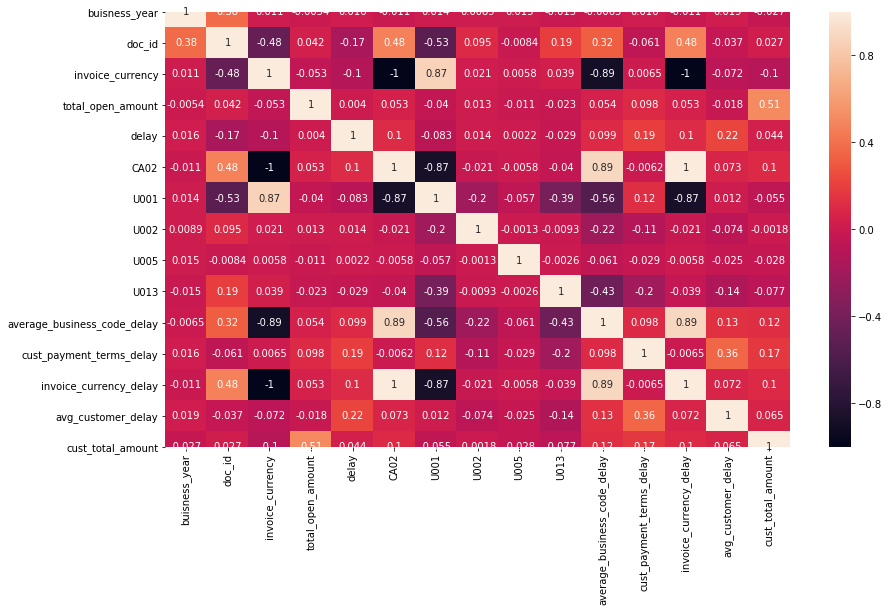

In [ ]:
corr=train.corr(method='spearman')
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

<p style="font-family:Sans-serif">
<ul>
    <li>No high correlation found on the existing features

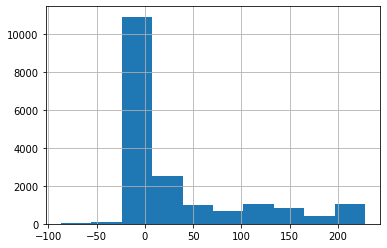

In [ ]:
train['delay'].hist(bins=10)
plt.show()

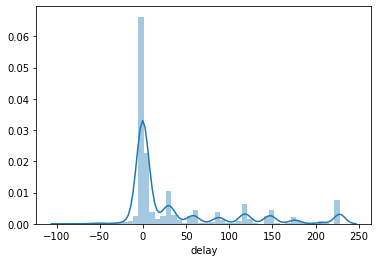

In [ ]:
sns.distplot(train['delay'])

~We observe how most of the delay lies between -20 to 20 days(approx.) with almost 0 as the mean.<br>
~The Curve is Positively-Skewed<br><br>

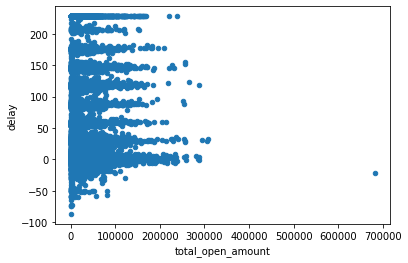

In [ ]:
train.plot(kind='scatter',x='total_open_amount',y='delay')
plt.show()

~We observe the variation in delay decreases as total_open_amount increases. Also most of the delay is for less amounts. <br>
~The Delay is close to 0 for extremely high Payment Amounts<br><br>

~ Plotting the <b>Target Column</b> against the <b>Categorical Feature

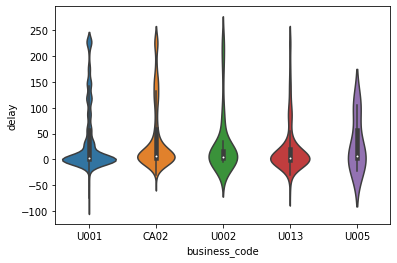

In [ ]:
sns.violinplot(x="business_code", y="delay", data=train)

<ul>
    <li> The Number of Transactions along with the Average Delay Value is lower for one-half.</li>
</ul><br>

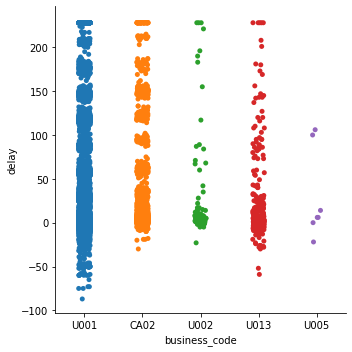

In [ ]:
sns.catplot(x="business_code", y="delay", data=train)

~<i>the delay is very high in U001 and CA02 as observed<br>

<p><b>~As Plotting against the 'due_in_date' column would not produce any productive Graph, so i will extract the months and days from the dates and check delay variation w.r.t to them.</b></p>

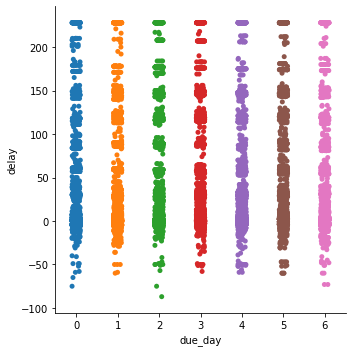

In [ ]:
train['due_day']=train['due_in_date'].dt.weekday
sns.catplot(x="due_day", y="delay", data=train)

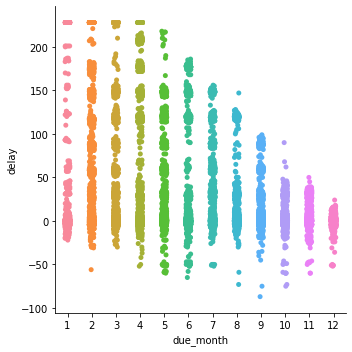

In [ ]:
train['due_month']=train['due_in_date'].dt.month
sns.catplot(x="due_month", y="delay", data=train)

<p><i>~Number of Transactions as the year ends, is significantly lessin comparison.<br>
    ~The Delay value is also close to 0, near the end of the Year

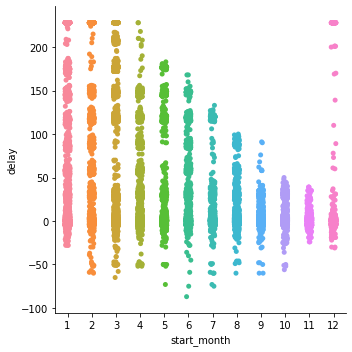

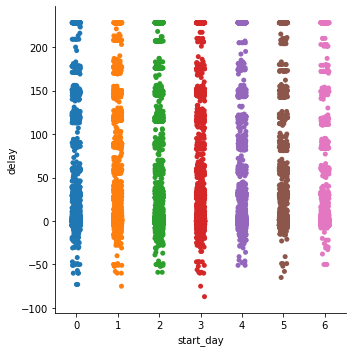

In [ ]:
train['start_day']=train['posting_date'].dt.weekday
train['start_month']=train['posting_date'].dt.month
sns.catplot(x="start_month", y="delay", data=train)
sns.catplot(x="start_day", y="delay", data=train)

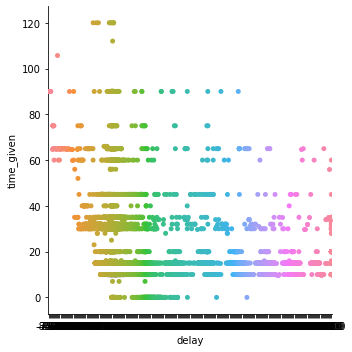

In [ ]:
train['time_given']=(train['due_in_date']-train['baseline_create_date']).dt.days
sns.catplot(x="delay", y="time_given", data=train)

In [ ]:
train.groupby(train['due_month'])['delay'].mean()

due_month
1     23.999268
2     86.669705
3     66.176214
4     74.163265
5     32.296623
6     36.995775
7     38.287444
8     17.076503
9     15.305111
10     4.733333
11     6.031299
12    -0.492196
Name: delay, dtype: float64

In [ ]:
train.groupby(train['due_day'])['delay'].mean()

due_day
0    36.175172
1    36.343558
2    41.427450
3    40.444147
4    37.815733
5    42.192237
6    37.027455
Name: delay, dtype: float64

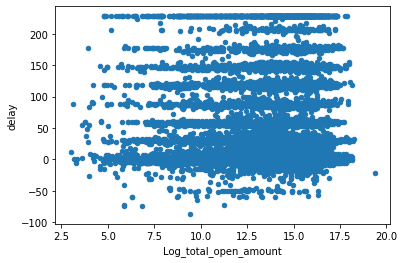

In [ ]:
train['Log_total_open_amount'] = np.log2(train['total_open_amount'])
train.plot(kind='scatter',x='Log_total_open_amount',y='delay')
plt.show()

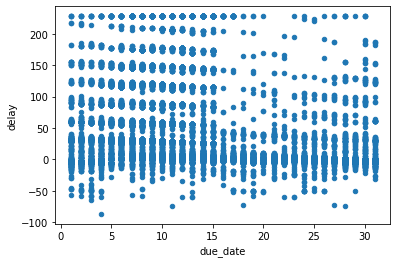

In [ ]:
train['due_date']=train['due_in_date'].dt.day
train.plot(kind='scatter',x='due_date',y='delay')
plt.show()

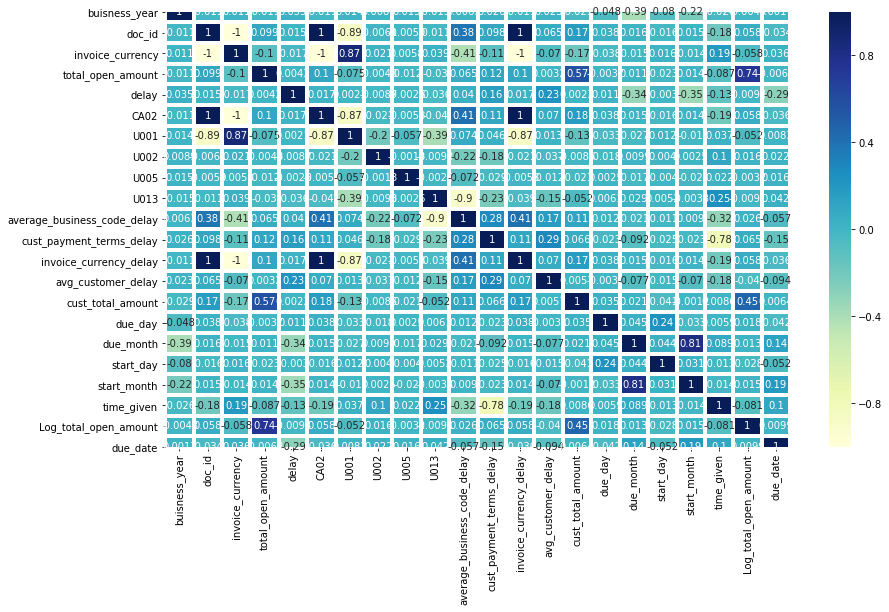

In [ ]:
fig,ax = plt.subplots(figsize=(14,8))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu",vmin=-1,vmax=1,linewidths=3,ax=ax)

~Conclusions:
We observe that the features <b><i>due_date </i></b> ,<b><i>due_month </i></b>,<b><i>start_month</i></b> are highly correlated with the Target Column

<br>
<hr style="height:2px;border-width:0;color:gray;background-color:black"">
<br>

# Feature selection and Engineering

~Applying these selected features on our validation and test sets.

In [ ]:
listofdfs=[val1,val2,Test]

for i in listofdfs:
    i['due_day']=i['due_in_date'].dt.weekday
    i['due_month']=i['due_in_date'].dt.month
    i['time_given']=(i['due_in_date']-i['baseline_create_date']).dt.days
    i['start_day']=i['posting_date'].dt.weekday
    i['start_month']=i['posting_date'].dt.month
    i['Log_total_open_amount'] = np.log(i['total_open_amount'])
    i['due_date']=i['due_in_date'].dt.day

<br><p style="font-family:monospace">~ Selecting all the <i>Numerical Features</i> which can be fit in a <b>Prediction Algorithm</b>:</p>
<p style="font-family:monospace">~Then, Spliting into trainx, testx, valx, testy, trainy and valy</p>

In [ ]:
list_of_features=[]
for i in train.columns:
    if((train[i].dtypes=='int64' or train[i].dtypes=='float64' or train[i].dtypes=='uint8') and i!='delay'):
        list_of_features.append(i)

trainx=train[list_of_features].copy()
trainy=train[['delay']].copy()
valx=val1[list_of_features].copy()
valy=val1[['delay']].copy()
testx=val2[list_of_features].copy()
testy=val2[['delay']].copy()

<br>
<hr style="height:2px;border-width:0;color:gray;background-color:black"">
<br>

# MODEL BASED TRAINING AND TESTING

While performing various techniques I am simultaneously Using <B>Sequential Forward Selection(SFS)</B> to select best features.

In [ ]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
Algorithm = []
R2_Score = []

# 1.Linear Regression

<h4><b>~First I used FFS to select the best Columns, then manually applied them.

In [ ]:
def FFS(trainx,trainy):
    # Sequential Forward Selection(sfs)
    sfs = SFS(LinearRegression(),
              k_features=5,
              forward=True,
              scoring = 'r2',
              cv = 5)
    sfs.fit(trainx,trainy)#doing the FFS
    return sfs.k_feature_names_
#list_of_features_selected=list(FFS(trainx,trainy))


list_of_features_selected=['due_date','start_month','avg_customer_delay']

trainx=train[list_of_features_selected].copy()
trainy=train[['delay']].copy()
valx=val1[list_of_features_selected].copy()
valy=val1[['delay']].copy()
testx=val2[list_of_features_selected].copy()
testy=val2[['delay']].copy()

# the scaler object (model)
#Standardization
scaler = StandardScaler()

# fit and transform the data
Trainx = scaler.fit_transform(trainx)
Trainy= scaler.fit_transform(trainy)
Testx = scaler.fit_transform(testx)
Testy = scaler.fit_transform(testy)
regressor = LinearRegression()
regressor.fit(Trainx, Trainy)

# Predicting the Test Set Results
predicted = regressor.predict(Testx)
print('List of features selected:',list_of_features_selected)
print('mean squared error = ',mean_squared_error(Testy, predicted))
linear_accuracy = round(regressor.score(Trainx,Trainy)*100,2)
print('mean absolute error = ',mean_absolute_error(Testy, predicted))
print('r2 score = ',r2_score(Testy, predicted))
accuracy = regressor.score(Testx, Testy)
print('root mean squared error = ',np.sqrt(mean_squared_error(Testy, predicted)*100))
print('Accuracy(%):',accuracy*100,'%')

Algorithm.append("LINEAR REGRESSION")
R2_Score.append(r2_score(Testy, predicted)*100)
MSE_Score.append(mean_squared_error(Testy, predicted))

List of features selected: ['due_date', 'start_month', 'avg_customer_delay']
mean squared error =  1.0269743699041707
mean absolute error =  0.8963069938151812
r2 score =  -0.02697436990417068
root mean squared error =  10.133974392626866
Accuracy(%): -2.697436990417068 %


# 2. Random Forest Regression

In [ ]:
def FFS(trainx,trainy):
    # Sequential Forward Selection(sfs)
    sfs = SFS(RandomForestRegressor(),
              k_features=3,
              forward=True,
              scoring = 'r2',
              cv = 5)
    sfs.fit(trainx,trainy)#doing the FFS
    return sfs.k_feature_names_
#list_of_features_selected=list(FFS(trainx,trainy))

list_of_features_selected=['due_date','start_month','cust_payment_terms_delay']

trainx_rfr=train[list_of_features_selected].copy()
trainy_rfr=train[['delay']].copy()
valx=val1[list_of_features_selected].copy()
valy=val1[['delay']].copy()
testx=val2[list_of_features_selected].copy()
testy=val2[['delay']].copy()


regressor=RandomForestRegressor(n_estimators=75,random_state=0)
regressor.fit(trainx_rfr,trainy_rfr)
predictor=regressor.predict(testx)
accuracy = regressor.score(testx, testy)
print('mean squared error = ',mean_squared_error(testy, predictor))
print('r2 score = ',r2_score(testy, predictor))
print('mean absolute error = ',mean_absolute_error(testy, predictor))
print('Root mean squared error = ',np.sqrt(mean_squared_error(testy, predictor)))
print('Accuracy: ',accuracy*100,'%')

Algorithm.append("RANDOM FOREST REGRESSION")
R2_Score.append(r2_score(testy, predictor)*100)
MSE_Score.append(np.sqrt(mean_squared_error(testy, predictor)))

mean squared error =  5691.146765374345
r2 score =  0.392168326988491
mean absolute error =  58.475930214426754
Root mean squared error =  75.43968958959431
Accuracy:  39.2168326988491 %


### We can also see the important features using Feature Importance method:

In [ ]:
# define the model
model = RandomForestRegressor(n_estimators=100,random_state = 1)
# fit the model
tempx,tempy = (train[list_of_features],train['delay'])
model.fit(tempx,tempy)
# get importance
importance = model.feature_importances_
# summarize feature importance
implist=list(importance)

imp = pd.DataFrame(implist, list_of_features)
imp.sort_values(by = [0],inplace = True,ascending = False)
Features_rfr = list(imp.nlargest(4,0).index)

In [ ]:
Features_rfr
print(imp)

                                    0
due_date                     0.280531
start_month                  0.134908
doc_id                       0.119333
avg_customer_delay           0.112418
cust_total_amount            0.071562
cust_payment_terms_delay     0.070621
Log_total_open_amount        0.054780
total_open_amount            0.054666
due_month                    0.044262
start_day                    0.021337
due_day                      0.018758
time_given                   0.010413
buisness_year                0.002006
U001                         0.001372
average_business_code_delay  0.000950
U002                         0.000742
CA02                         0.000479
invoice_currency_delay       0.000421
U013                         0.000379
U005                         0.000063


# 3. Gradient Boost Regressor

In [ ]:
def FFS(trainx,trainy):
    # Sequential Forward Selection(sfs)
    sfs = SFS(GradientBoostingRegressor(),
              k_features=5,
              forward=True,
              scoring = 'r2',
              cv = 5)
    sfs.fit(trainx,trainy)#doing the FFS
    return sfs.k_feature_names_
#list_of_features_selected=list(FFS(trainx,trainy))


list_of_features_selected=['due_month', 'due_date','start_month','buisness_year','U001']

trainx=train[list_of_features_selected].copy()
trainy=train[['delay']].copy()
valx=val1[list_of_features_selected].copy()
valy=val1[['delay']].copy()
testx=val2[list_of_features_selected].copy()
testy=val2[['delay']].copy()

GBR_model = GradientBoostingRegressor(n_estimators=55, max_depth=4)
GBR_model.fit(trainx, trainy)
predictor = GBR_model.predict(testx)
GBR_model_accuracy = round(GBR_model.score(trainx, trainy)*100,2)
print(round(GBR_model_accuracy,2),'%')
print('mean squared error = ',mean_squared_error(testy, predictor))
print('r2 score = ',r2_score(testy, predictor))
print('mean absolute error = ',mean_absolute_error(testy, predictor))
print('root mean squared error = ',np.sqrt(mean_squared_error(testy, predictor)))
accuracy = GBR_model.score(testx, testy)
print(accuracy*100,'%')
print(list_of_features_selected)

Algorithm.append("GRADIENT BOOST REGRESSION")
R2_Score.append(r2_score(testy, predictor)*100)
MSE_Score.append(np.sqrt(mean_squared_error(testy, predictor)))

44.8 %
mean squared error =  5861.435029640678
r2 score =  0.37398102575897807
mean absolute error =  60.96031399982067
root mean squared error =  76.56000933673322
37.39810257589781 %
['due_month', 'due_date', 'start_month', 'buisness_year', 'U001']


# 4. eXTREME GB Regressor

In [ ]:
def FFS(trainx,trainy):
    # Sequential Forward Selection(sfs)
    sfs = SFS(xgb.XGBRegressor(verbosity=0),
              k_features=5,
              forward=True,
              scoring = 'r2',
              cv = 5)
    sfs.fit(trainx,trainy)#doing the FFS
    return sfs.k_feature_names_
#list_of_features_selected=list(FFS(trainx,trainy))

list_of_features_selected=['due_month', 'due_date','start_month','buisness_year','U001']

trainx=train[list_of_features_selected].copy()
trainy=train[['delay']].copy()
valx=val1[list_of_features_selected].copy()
valy=val1[['delay']].copy()
testx=val2[list_of_features_selected].copy()
testy=val2[['delay']].copy()

# the scaler object (model)
#scaler = StandardScaler()
# fit and transform the data
#Trainx = scaler.fit_transform(trainx)
#Trainy= scaler.fit_transform(trainy)
#Testx = scaler.fit_transform(testx)
#Testy = scaler.fit_transform(testy)

xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(trainx, trainy)
predictor = xgbr.predict(testx)
print('mean squared error = ',mean_squared_error(testy, predictor))
print('r2 score = ',r2_score(testy, predictor))
print('mean absolute error = ',mean_absolute_error(testy, predictor))
print('root mean squared error = ',np.sqrt(mean_squared_error(testy, predictor)))
print('accuracy=',r2_score(testy, predictor)*100,'%')
Algorithm.append("X GRADIENT BOOST REGRESSION")
R2_Score.append(r2_score(testy, predictor)*100)
MSE_Score.append(np.sqrt(mean_squared_error(testy, predictor)))

mean squared error =  6286.696271546673
r2 score =  0.32856183999709576
mean absolute error =  57.32385609970363
root mean squared error =  79.28868943012411
accuracy= 32.85618399970958 %


<br>
<hr style="height:2px;border-width:0;color:gray;background-color:black"">
<br>

# Prediction on Final test case

<h3>~Since the best Accuracy came in <b>Random Forest Regression</b>, we use it to predict the final test case.</h3>

In [ ]:
#from RFR
columnsSelected=['due_date','start_month','cust_payment_terms_delay']
Test_x=Test[columnsSelected]
regressor=RandomForestRegressor(n_estimators=75,random_state=0)
#fitting
regressor.fit(trainx_rfr,trainy_rfr)
predictions=regressor.predict(Test_x)
delays=np.round(predictions)
delayPrediction=pd.DataFrame(delays)
PredictedTest=data_used[data_used['isOpen']==1].copy()

In [ ]:
PredictedTest=PredictedTest.reset_index(drop=True)

PredictedTest.rename(columns={'clear_date':'Predicted_clear_date'},inplace=True)

PredictedTest['delay_predicted']=delayPrediction[0].astype(int)

PredictedTest['Predicted_clear_date'] = PredictedTest['due_in_date'] + pd.to_timedelta(PredictedTest['delay_predicted'],unit="D")

#For the bucketization process:
max_val=PredictedTest['delay_predicted'].max()
min_val=PredictedTest['delay_predicted'].min()
bins=[min_val-1,0,15,30,45,60,max_val+1]
category=['<0 days','0-15 days','16-30 days','30-45 days','45-60 days','>60 days']

PredictedTest['Aging Bucket'] = pd.cut(PredictedTest['delay_predicted'],bins,labels=category)
PredictedTest.drop(['delay_predicted'],axis=1,inplace=True)
final_display_columns=['invoice_id','due_in_date','total_open_amount','Predicted_clear_date','Aging Bucket']

FinalDisplay=PredictedTest[final_display_columns]
FinalDisplay

,invoice_id,due_in_date,total_open_amount,Predicted_clear_date,Aging Bucket
0,1.930685e+09,2020-04-07,57369.28,2020-08-03,>60 days
1,1.930657e+09,2020-04-02,62864.82,2020-05-28,45-60 days
2,1.930788e+09,2020-04-30,6569.86,2020-04-28,<0 days
3,1.930579e+09,2020-03-13,23527.30,2020-04-13,30-45 days
4,1.930654e+09,2020-03-31,18568.24,2020-03-29,<0 days
...,...,...,...,...,...
2685,1.930688e+09,2020-04-07,45503.30,2020-07-30,>60 days
2686,2.960629e+09,2020-05-05,122958.67,2020-08-08,>60 days
2687,1.930664e+09,2020-03-27,46168.00,2020-03-27,<0 days
2688,1.930813e+09,2020-05-06,32525.94,2020-08-02,>60 days


<b>~Above is the complete final output data<br><br>

#### Below is the bar graph representing the Aging bucket

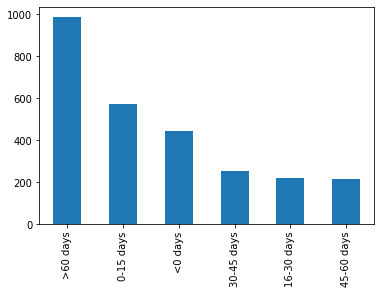

In [ ]:
fig, ax = plt.subplots()
FinalDisplay['Aging Bucket'].value_counts().plot(ax=ax, kind='bar')

### Comparasion Table

In [ ]:
list_of_tuples = list(zip(Algorithm, R2_Score, MSE_Score))
list_of_tuples
TABLE= pd.DataFrame(list_of_tuples, columns = ['Algorithm','R2_score(%)','RMSE'])
TABLE

,Algorithm,R2_score(%),RMSE
0,LINEAR REGRESSION,-2.697437,1.026974
1,RANDOM FOREST REGRESSION,39.216833,75.439690
2,GRADIENT BOOST REGRESSION,37.398103,76.560009
3,X GRADIENT BOOST REGRESSION,32.856184,79.288689


<br>
<hr style="height:2px;border-width:0;color:gray;background-color:black"">
<br>

<h1><center>THE END </center></h1><i></i>

<br>
<hr style="height:2px;border-width:0;color:gray;background-color:black"">
<br>